## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  28.791951  1336.694247  0.320832  8.084448  1.390435
1  43.877605  1012.185509  0.111049  2.312903  1.221009
2  64.034375   192.379836  0.062986  9.456548 -0.024883
3  46.269242   417.220189  0.977725  8.504405  1.492734
4  60.727896   733.796835  0.987933  9.718137  1.332816


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 0.9492981	total: 65.6ms	remaining: 1m 5s
1:	learn: 0.9417295	total: 66.4ms	remaining: 33.1s
2:	learn: 0.9309009	total: 66.9ms	remaining: 22.2s
3:	learn: 0.9202360	total: 67.6ms	remaining: 16.8s
4:	learn: 0.9085565	total: 71.5ms	remaining: 14.2s
5:	learn: 0.8983101	total: 72.2ms	remaining: 12s
6:	learn: 0.8881042	total: 72.8ms	remaining: 10.3s
7:	learn: 0.8768048	total: 75.4ms	remaining: 9.35s
8:	learn: 0.8687825	total: 76.3ms	remaining: 8.4s
9:	learn: 0.8593635	total: 77.1ms	remaining: 7.63s
10:	learn: 0.8498041	total: 77.7ms	remaining: 6.99s
11:	learn: 0.8411138	total: 78.2ms	remaining: 6.44s
12:	learn: 0.8321402	total: 110ms	remaining: 8.35s
13:	learn: 0.8233739	total: 124ms	remaining: 8.76s
14:	learn: 0.8147380	total: 132ms	remaining: 8.64s
15:	learn: 0.8054525	total: 136ms	remaining: 8.33s
16:	learn: 0.7945197	total: 136ms	remaining: 7.87s
17:	learn: 0.7869840	total: 142ms	remaining: 7.77s
18:	learn: 0.7800639	total: 143ms	remaining: 7.38s
19:	learn: 0.7725431	total: 144m

26:	learn: 0.7168843	total: 182ms	remaining: 6.57s
27:	learn: 0.7099459	total: 184ms	remaining: 6.39s
28:	learn: 0.7023097	total: 185ms	remaining: 6.18s
29:	learn: 0.6947024	total: 186ms	remaining: 6.03s
30:	learn: 0.6882989	total: 187ms	remaining: 5.85s
31:	learn: 0.6809428	total: 193ms	remaining: 5.84s
32:	learn: 0.6749881	total: 199ms	remaining: 5.83s
33:	learn: 0.6698679	total: 200ms	remaining: 5.67s
34:	learn: 0.6626779	total: 201ms	remaining: 5.55s
35:	learn: 0.6549945	total: 211ms	remaining: 5.66s
36:	learn: 0.6458806	total: 212ms	remaining: 5.53s
37:	learn: 0.6408342	total: 213ms	remaining: 5.4s


38:	learn: 0.6339735	total: 228ms	remaining: 5.62s
39:	learn: 0.6280330	total: 238ms	remaining: 5.71s
40:	learn: 0.6223079	total: 238ms	remaining: 5.58s
41:	learn: 0.6155377	total: 240ms	remaining: 5.47s
42:	learn: 0.6095121	total: 241ms	remaining: 5.36s
43:	learn: 0.6040281	total: 242ms	remaining: 5.26s
44:	learn: 0.5981720	total: 250ms	remaining: 5.31s
45:	learn: 0.5914134	total: 251ms	remaining: 5.21s
46:	learn: 0.5861513	total: 255ms	remaining: 5.17s
47:	learn: 0.5810379	total: 256ms	remaining: 5.07s
48:	learn: 0.5742445	total: 257ms	remaining: 4.98s
49:	learn: 0.5687295	total: 258ms	remaining: 4.9s
50:	learn: 0.5639920	total: 259ms	remaining: 4.82s
51:	learn: 0.5592925	total: 260ms	remaining: 4.74s
52:	learn: 0.5542201	total: 261ms	remaining: 4.67s
53:	learn: 0.5490543	total: 262ms	remaining: 4.59s
54:	learn: 0.5445642	total: 264ms	remaining: 4.53s
55:	learn: 0.5397670	total: 265ms	remaining: 4.46s
56:	learn: 0.5356798	total: 265ms	remaining: 4.39s
57:	learn: 0.5306701	total: 266m

109:	learn: 0.3486327	total: 333ms	remaining: 2.69s
110:	learn: 0.3457052	total: 334ms	remaining: 2.68s
111:	learn: 0.3430423	total: 336ms	remaining: 2.67s
112:	learn: 0.3405122	total: 337ms	remaining: 2.65s
113:	learn: 0.3381925	total: 338ms	remaining: 2.62s
114:	learn: 0.3353096	total: 338ms	remaining: 2.6s
115:	learn: 0.3330966	total: 339ms	remaining: 2.58s
116:	learn: 0.3314238	total: 339ms	remaining: 2.56s
117:	learn: 0.3292983	total: 342ms	remaining: 2.56s
118:	learn: 0.3267101	total: 343ms	remaining: 2.54s
119:	learn: 0.3249593	total: 344ms	remaining: 2.52s
120:	learn: 0.3226971	total: 345ms	remaining: 2.5s
121:	learn: 0.3203058	total: 346ms	remaining: 2.49s
122:	learn: 0.3178180	total: 346ms	remaining: 2.47s
123:	learn: 0.3157145	total: 347ms	remaining: 2.45s
124:	learn: 0.3139245	total: 347ms	remaining: 2.43s
125:	learn: 0.3114527	total: 348ms	remaining: 2.41s
126:	learn: 0.3093547	total: 349ms	remaining: 2.4s
127:	learn: 0.3066744	total: 350ms	remaining: 2.38s
128:	learn: 0.3

176:	learn: 0.2262757	total: 382ms	remaining: 1.77s
177:	learn: 0.2250726	total: 383ms	remaining: 1.77s
178:	learn: 0.2237439	total: 383ms	remaining: 1.76s
179:	learn: 0.2223637	total: 384ms	remaining: 1.75s
180:	learn: 0.2211123	total: 384ms	remaining: 1.74s
181:	learn: 0.2198262	total: 385ms	remaining: 1.73s
182:	learn: 0.2187390	total: 386ms	remaining: 1.72s
183:	learn: 0.2173616	total: 386ms	remaining: 1.71s
184:	learn: 0.2163085	total: 387ms	remaining: 1.7s
185:	learn: 0.2153205	total: 387ms	remaining: 1.69s
186:	learn: 0.2140828	total: 387ms	remaining: 1.68s
187:	learn: 0.2128973	total: 388ms	remaining: 1.68s
188:	learn: 0.2118743	total: 389ms	remaining: 1.67s
189:	learn: 0.2107830	total: 389ms	remaining: 1.66s
190:	learn: 0.2096881	total: 390ms	remaining: 1.65s
191:	learn: 0.2087581	total: 390ms	remaining: 1.64s
192:	learn: 0.2079406	total: 392ms	remaining: 1.64s
193:	learn: 0.2067663	total: 393ms	remaining: 1.63s
194:	learn: 0.2060897	total: 394ms	remaining: 1.63s
195:	learn: 0

302:	learn: 0.1196056	total: 480ms	remaining: 1.1s
303:	learn: 0.1188052	total: 487ms	remaining: 1.11s
304:	learn: 0.1185090	total: 489ms	remaining: 1.11s
305:	learn: 0.1180366	total: 490ms	remaining: 1.11s
306:	learn: 0.1174223	total: 490ms	remaining: 1.1s
307:	learn: 0.1169552	total: 490ms	remaining: 1.1s
308:	learn: 0.1165060	total: 492ms	remaining: 1.1s
309:	learn: 0.1160509	total: 493ms	remaining: 1.1s
310:	learn: 0.1158151	total: 493ms	remaining: 1.09s
311:	learn: 0.1152193	total: 494ms	remaining: 1.09s
312:	learn: 0.1147796	total: 494ms	remaining: 1.08s
313:	learn: 0.1143527	total: 494ms	remaining: 1.08s
314:	learn: 0.1139304	total: 495ms	remaining: 1.08s
315:	learn: 0.1135152	total: 502ms	remaining: 1.09s


316:	learn: 0.1131070	total: 503ms	remaining: 1.08s
317:	learn: 0.1127056	total: 503ms	remaining: 1.08s
318:	learn: 0.1123125	total: 503ms	remaining: 1.07s
319:	learn: 0.1119244	total: 504ms	remaining: 1.07s
320:	learn: 0.1115391	total: 504ms	remaining: 1.07s
321:	learn: 0.1111759	total: 505ms	remaining: 1.06s
322:	learn: 0.1109379	total: 506ms	remaining: 1.06s
323:	learn: 0.1105747	total: 506ms	remaining: 1.05s
324:	learn: 0.1102145	total: 506ms	remaining: 1.05s
325:	learn: 0.1098659	total: 507ms	remaining: 1.05s
326:	learn: 0.1095305	total: 507ms	remaining: 1.04s
327:	learn: 0.1091842	total: 508ms	remaining: 1.04s
328:	learn: 0.1088469	total: 509ms	remaining: 1.04s
329:	learn: 0.1085152	total: 510ms	remaining: 1.03s
330:	learn: 0.1081917	total: 510ms	remaining: 1.03s
331:	learn: 0.1078708	total: 512ms	remaining: 1.03s
332:	learn: 0.1075594	total: 512ms	remaining: 1.03s
333:	learn: 0.1070804	total: 513ms	remaining: 1.02s
334:	learn: 0.1067790	total: 513ms	remaining: 1.02s
335:	learn: 

381:	learn: 0.0947987	total: 549ms	remaining: 892ms
382:	learn: 0.0945044	total: 550ms	remaining: 888ms
383:	learn: 0.0943746	total: 551ms	remaining: 886ms
384:	learn: 0.0942640	total: 555ms	remaining: 888ms
385:	learn: 0.0941385	total: 556ms	remaining: 887ms
386:	learn: 0.0940315	total: 557ms	remaining: 885ms
387:	learn: 0.0939103	total: 560ms	remaining: 886ms
388:	learn: 0.0936254	total: 561ms	remaining: 883ms
389:	learn: 0.0935074	total: 561ms	remaining: 880ms
390:	learn: 0.0934061	total: 562ms	remaining: 877ms
391:	learn: 0.0933066	total: 562ms	remaining: 874ms
392:	learn: 0.0930293	total: 563ms	remaining: 871ms
393:	learn: 0.0928416	total: 565ms	remaining: 871ms
394:	learn: 0.0926461	total: 566ms	remaining: 868ms
395:	learn: 0.0923758	total: 566ms	remaining: 866ms
396:	learn: 0.0922127	total: 567ms	remaining: 863ms
397:	learn: 0.0921042	total: 567ms	remaining: 860ms
398:	learn: 0.0920112	total: 568ms	remaining: 858ms
399:	learn: 0.0915375	total: 568ms	remaining: 855ms
400:	learn: 

468:	learn: 0.0775045	total: 640ms	remaining: 726ms
469:	learn: 0.0773222	total: 646ms	remaining: 730ms
470:	learn: 0.0769332	total: 646ms	remaining: 727ms
471:	learn: 0.0768357	total: 647ms	remaining: 725ms
472:	learn: 0.0767781	total: 647ms	remaining: 723ms
473:	learn: 0.0763847	total: 648ms	remaining: 720ms
474:	learn: 0.0763185	total: 648ms	remaining: 718ms
475:	learn: 0.0758834	total: 649ms	remaining: 716ms
476:	learn: 0.0757989	total: 649ms	remaining: 713ms
477:	learn: 0.0753768	total: 651ms	remaining: 713ms
478:	learn: 0.0751094	total: 652ms	remaining: 710ms
479:	learn: 0.0749397	total: 652ms	remaining: 708ms
480:	learn: 0.0748593	total: 653ms	remaining: 706ms
481:	learn: 0.0747547	total: 654ms	remaining: 704ms
482:	learn: 0.0743876	total: 654ms	remaining: 702ms
483:	learn: 0.0743001	total: 655ms	remaining: 699ms
484:	learn: 0.0742465	total: 655ms	remaining: 697ms
485:	learn: 0.0738918	total: 655ms	remaining: 695ms
486:	learn: 0.0738061	total: 656ms	remaining: 693ms
487:	learn: 

618:	learn: 0.0544727	total: 778ms	remaining: 479ms
619:	learn: 0.0542585	total: 778ms	remaining: 478ms
620:	learn: 0.0541558	total: 779ms	remaining: 476ms
621:	learn: 0.0539303	total: 780ms	remaining: 475ms
622:	learn: 0.0537705	total: 780ms	remaining: 473ms
623:	learn: 0.0536247	total: 781ms	remaining: 471ms
624:	learn: 0.0534819	total: 782ms	remaining: 470ms
625:	learn: 0.0533264	total: 782ms	remaining: 468ms
626:	learn: 0.0532262	total: 783ms	remaining: 467ms
627:	learn: 0.0531223	total: 784ms	remaining: 465ms
628:	learn: 0.0529712	total: 784ms	remaining: 463ms
629:	learn: 0.0528724	total: 785ms	remaining: 462ms
630:	learn: 0.0526917	total: 788ms	remaining: 461ms
631:	learn: 0.0525570	total: 790ms	remaining: 461ms


632:	learn: 0.0522781	total: 791ms	remaining: 459ms
633:	learn: 0.0521815	total: 791ms	remaining: 459ms
634:	learn: 0.0519771	total: 793ms	remaining: 457ms
635:	learn: 0.0517627	total: 794ms	remaining: 456ms


636:	learn: 0.0516115	total: 795ms	remaining: 455ms
637:	learn: 0.0515288	total: 796ms	remaining: 453ms
638:	learn: 0.0514475	total: 798ms	remaining: 452ms
639:	learn: 0.0511776	total: 800ms	remaining: 451ms
640:	learn: 0.0510979	total: 802ms	remaining: 450ms
641:	learn: 0.0510034	total: 803ms	remaining: 449ms
642:	learn: 0.0509250	total: 804ms	remaining: 448ms
643:	learn: 0.0508316	total: 805ms	remaining: 447ms
644:	learn: 0.0505149	total: 806ms	remaining: 445ms
645:	learn: 0.0504233	total: 807ms	remaining: 444ms
646:	learn: 0.0503687	total: 808ms	remaining: 442ms
647:	learn: 0.0502783	total: 810ms	remaining: 442ms
648:	learn: 0.0500204	total: 811ms	remaining: 440ms
649:	learn: 0.0499316	total: 812ms	remaining: 438ms
650:	learn: 0.0497365	total: 812ms	remaining: 437ms
651:	learn: 0.0495818	total: 815ms	remaining: 436ms
652:	learn: 0.0493906	total: 817ms	remaining: 435ms
653:	learn: 0.0492404	total: 818ms	remaining: 434ms
654:	learn: 0.0490530	total: 818ms	remaining: 432ms
655:	learn: 

729:	learn: 0.0409309	total: 896ms	remaining: 332ms
730:	learn: 0.0408998	total: 896ms	remaining: 331ms
731:	learn: 0.0408300	total: 897ms	remaining: 329ms
732:	learn: 0.0407358	total: 900ms	remaining: 329ms
733:	learn: 0.0405689	total: 901ms	remaining: 327ms
734:	learn: 0.0404384	total: 902ms	remaining: 326ms
735:	learn: 0.0403827	total: 906ms	remaining: 326ms
736:	learn: 0.0403527	total: 907ms	remaining: 324ms
737:	learn: 0.0401849	total: 907ms	remaining: 323ms
738:	learn: 0.0401553	total: 908ms	remaining: 321ms
739:	learn: 0.0400080	total: 908ms	remaining: 320ms
740:	learn: 0.0399549	total: 911ms	remaining: 319ms
741:	learn: 0.0399012	total: 912ms	remaining: 318ms
742:	learn: 0.0397366	total: 914ms	remaining: 317ms
743:	learn: 0.0395757	total: 915ms	remaining: 316ms
744:	learn: 0.0395387	total: 915ms	remaining: 314ms
745:	learn: 0.0393709	total: 915ms	remaining: 313ms
746:	learn: 0.0392136	total: 916ms	remaining: 311ms
747:	learn: 0.0390798	total: 917ms	remaining: 310ms
748:	learn: 

829:	learn: 0.0333156	total: 997ms	remaining: 205ms
830:	learn: 0.0332955	total: 1s	remaining: 204ms
831:	learn: 0.0332361	total: 1s	remaining: 203ms
832:	learn: 0.0332162	total: 1s	remaining: 201ms
833:	learn: 0.0331395	total: 1s	remaining: 200ms
834:	learn: 0.0331200	total: 1s	remaining: 199ms
835:	learn: 0.0331007	total: 1s	remaining: 198ms
836:	learn: 0.0330425	total: 1.01s	remaining: 196ms
837:	learn: 0.0330234	total: 1.01s	remaining: 195ms
838:	learn: 0.0329495	total: 1.01s	remaining: 194ms
839:	learn: 0.0329308	total: 1.01s	remaining: 192ms
840:	learn: 0.0329123	total: 1.01s	remaining: 192ms
841:	learn: 0.0328864	total: 1.01s	remaining: 190ms
842:	learn: 0.0328682	total: 1.01s	remaining: 189ms
843:	learn: 0.0328111	total: 1.01s	remaining: 188ms
844:	learn: 0.0327435	total: 1.01s	remaining: 187ms
845:	learn: 0.0327255	total: 1.01s	remaining: 185ms
846:	learn: 0.0327078	total: 1.02s	remaining: 184ms
847:	learn: 0.0325523	total: 1.02s	remaining: 183ms
848:	learn: 0.0324967	total: 1

984:	learn: 0.0229649	total: 1.15s	remaining: 17.6ms
985:	learn: 0.0229167	total: 1.15s	remaining: 16.4ms
986:	learn: 0.0228395	total: 1.16s	remaining: 15.3ms
987:	learn: 0.0227885	total: 1.16s	remaining: 14.1ms
988:	learn: 0.0227473	total: 1.16s	remaining: 12.9ms
989:	learn: 0.0226783	total: 1.16s	remaining: 11.7ms
990:	learn: 0.0226308	total: 1.16s	remaining: 10.5ms
991:	learn: 0.0225628	total: 1.16s	remaining: 9.37ms
992:	learn: 0.0225000	total: 1.16s	remaining: 8.19ms
993:	learn: 0.0224470	total: 1.16s	remaining: 7.02ms
994:	learn: 0.0223558	total: 1.16s	remaining: 5.86ms
995:	learn: 0.0222944	total: 1.16s	remaining: 4.69ms
996:	learn: 0.0222051	total: 1.17s	remaining: 3.52ms
997:	learn: 0.0221652	total: 1.17s	remaining: 2.35ms
998:	learn: 0.0221266	total: 1.17s	remaining: 1.18ms
999:	learn: 0.0220419	total: 1.17s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.40868853528214577


ABC Pre-generator MAE 0.4045784829109486


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

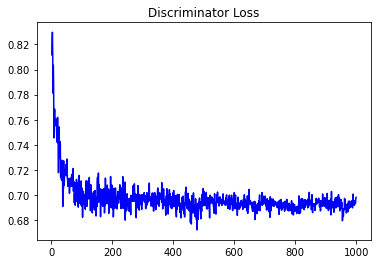

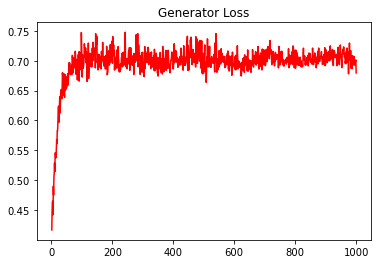

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.7770248256987543


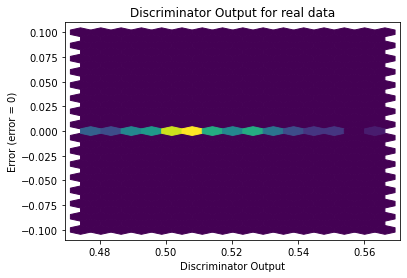

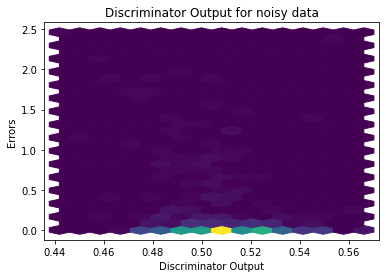

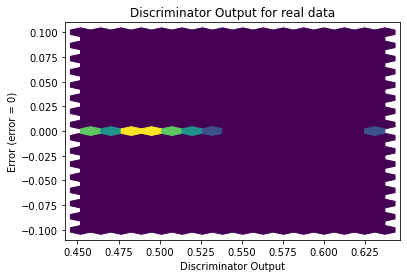

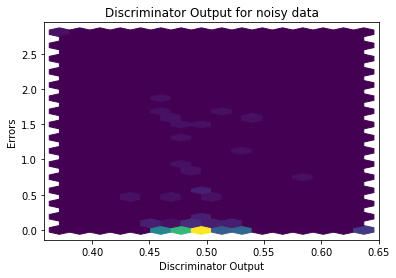

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

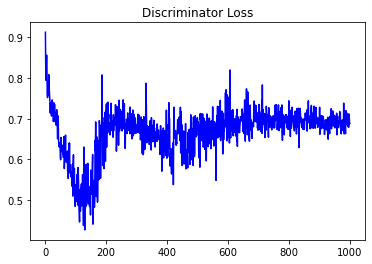

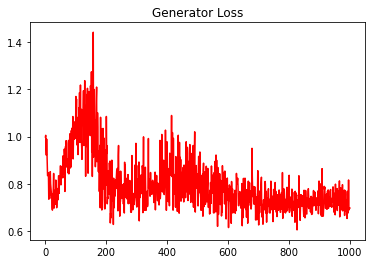

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.8477845748522668


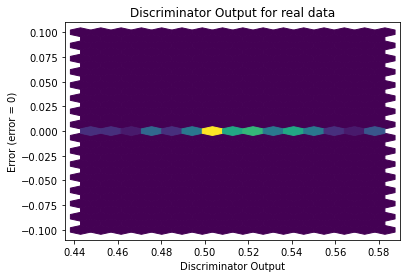

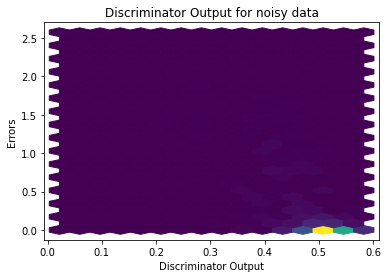

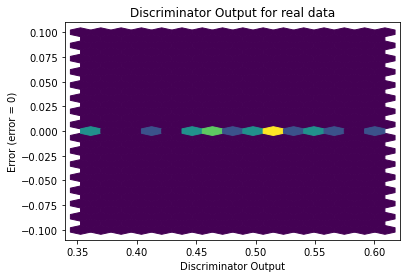

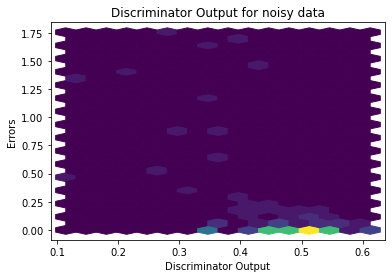

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


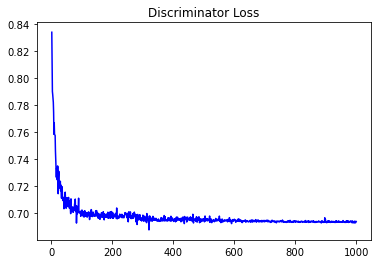

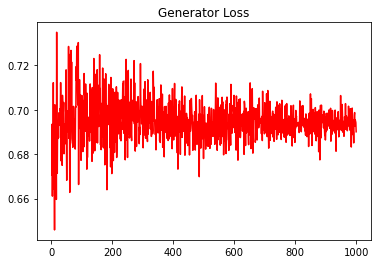

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4428065313390107


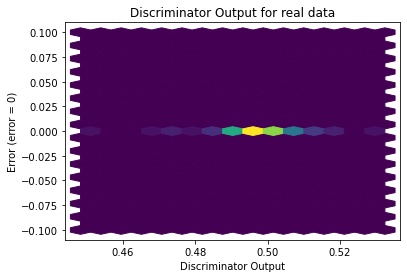

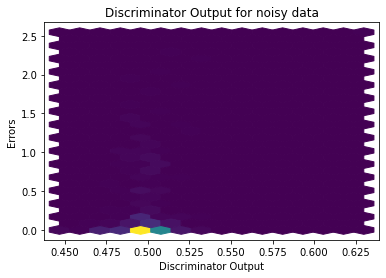

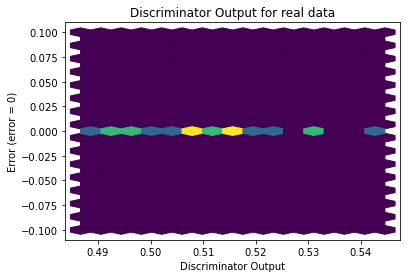

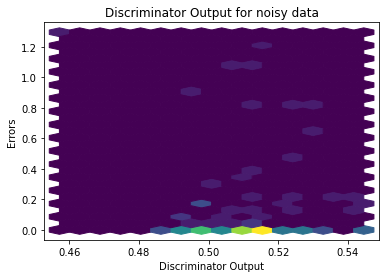

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


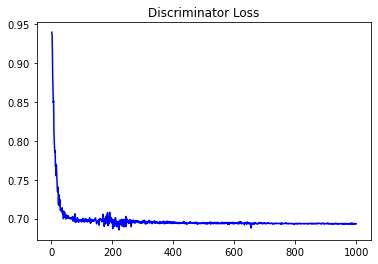

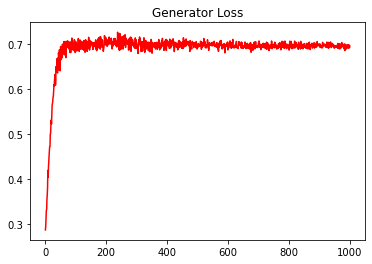

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.40435095526190706


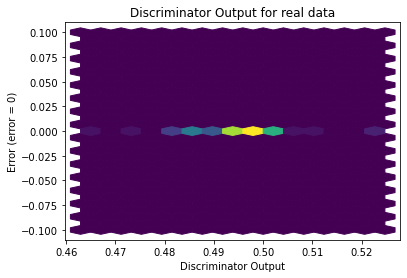

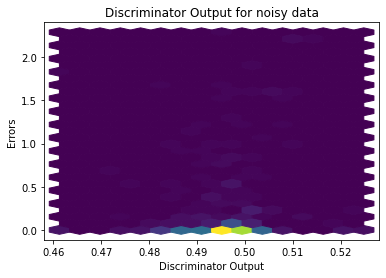

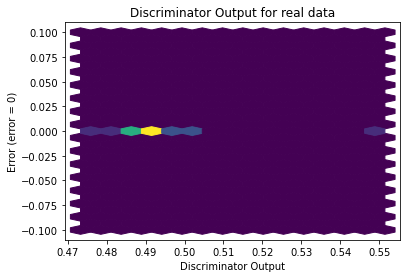

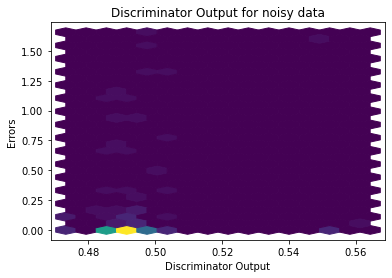

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0711]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0061]], requires_grad=True)
